<a href="https://colab.research.google.com/github/jsebasc3/SlopeStability/blob/master/SlopeStability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Embankment and excavation stress paths in a normally consolidated soil.



In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##Embankment

Se obtienen las rutas de esfuerzos en un terraplen. donde $ETS$ es el esfuerzo total efectivo, $TSP$ esfuerzo total efectivo y $(T-U_o)SP$ esfuerzo total menos presión de poros. Se presenta $\Delta U_o >0$ debido al exceso de presión de poros después de haber colocado la sobre-carga.



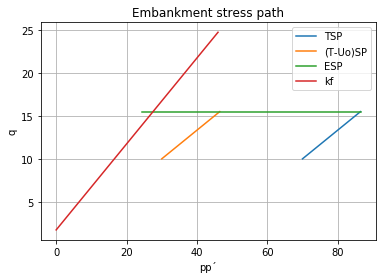

In [3]:
#DATOS DE ENTRADA
esp1=20 #peso especifico suelo
esp2=22 #peso especifico del lleno
gwp=0 #altura nivel freatico
k0=0.5 #presion de tierra
h=4#profundidad punto A
h1=1 #alturalleno

#condiciones para kf
c=2
phi=30

#___________________________________________________________
#caso inicial
sigmav=esp1*h
u=10*(h-gwp)
esigmav=sigmav-u
esigmah=esigmav*k0
sigmah=esigmah+u

p1=(sigmav+sigmah)/2
ep1=(esigmav+esigmah)/2
q1=(sigmav-sigmah)/2
 
#caso secundario
sigmav=esp1*h + esp2*h1
u=10*(h-gwp)
esigmav=sigmav-u
esigmah=esigmav*k0
sigmah=esigmah+u

p2=(sigmav+sigmah)/2
ep2=(esigmav+esigmah)/2
q2=(sigmav-sigmah)/2
       
#caso terciario
sigmav=esp1*h + esp2*h1
u=10*(h-gwp)
esigmav=sigmav-u
esigmah=esigmav*k0
sigmah=esigmah+u
esigmav=esigmav-(esp2*h1)
esigmah=esigmah-(esp2*h1)

p3=(sigmav+sigmah)/2
ep3=(esigmav+esigmah)/2
q3=(sigmav-sigmah)/2

#se define kf
a=c*np.cos(phi*3.1415/180)
p=np.arange(0,ep2,1)
q=a+p*np.sin(phi*3.1415/180)

plt.plot([p1,p2],[q1,q2],label='TSP')
plt.plot([ep1,ep2],[q1,q2],label='(T-Uo)SP')
plt.plot([p3,ep3],[q3,q3],label='ESP')
plt.plot(p,q,label="kf")

plt.plot()
plt.xlabel("pp´")
plt.ylabel("q")
plt.title("Embankment stress path")
plt.legend()
plt.grid(True)
plt.show()
#fig.savefig("embakment.png")

## Excavation
Se analiza el caso para una excavación, en el momento $t=0$ después de haber hecho la excavacion no se presenta una relajación de esfuerzos en $\sigma'_h$ por lo que se toma el mismo valor que la condición inicial. También en este caso se puede presentar un $\Delta U_0 < 0 $ debido a la reducción del nivel freático que con el tiempo tiende a disiparse.

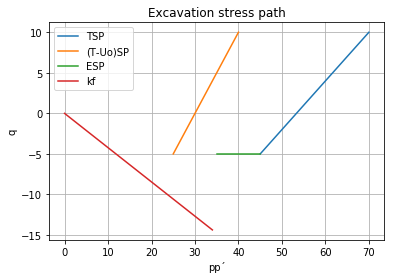

In [4]:
#DATOS DE ENTRADA
esp1=20 #peso especifico del suelo
gwp=1 #altura nivel freatico
k0=0.6 #presion de tierra
h=4#profundidad punto A
h1=2 #prof_excavacion

#condiciones para kf
c=2
phi=25

#___________________________________________________________
#caso inicial
sigmav=esp1*h
u=10*(h-gwp)
esigmav=sigmav-u
esigmah=esigmav*k0
sigmah=esigmah+u

p1=(sigmav+sigmah)/2
ep1=(esigmav+esigmah)/2
q1=(sigmav-sigmah)/2
 
#caso secundario
sigmav=esp1*(h-h1) 
if h1>=gwp:
    u=10*(h-h1)
else:
    u=10*(h-gwp)

esigmav=sigmav-u
sigmah=esigmah+u

p2=(sigmav+sigmah)/2
ep2=(esigmav+esigmah)/2
q2=(sigmav-sigmah)/2

#caso terciario

if h1>=gwp:
    esigmav=sigmav-(10*(h1-gwp))
    esigmah=sigmah-(10*(h1-gwp))

p3=(sigmav+sigmah)/2
ep3=(esigmav+esigmah)/2
q3=(sigmav-sigmah)/2

#se define kf
a=c*np.cos(phi*3.1415/180)
p=np.arange(0,ep3,1)
q=-p*np.sin(phi*3.1415/180)

plt.plot([p1,p2],[q1,q2],label='TSP')
plt.plot([ep1,ep2],[q1,q2],label='(T-Uo)SP')
plt.plot([p3,ep3],[q3,q3],label='ESP')
plt.plot(p,q,label="kf")

plt.plot()
plt.xlabel("pp´")
plt.ylabel("q")
plt.title("Excavation stress path")
plt.legend()
plt.grid(True)
plt.show()
#fig.savefig("embakment.png")

#Slope stability methods

##Fellenious Method

Con este método (válido solo para superficies de deslizamiento circulares) se pasan por alto las fuerzas entre las franjas, por lo tanto las incógnitas se reducen a:

$$F.O.S=\frac{\sum_{i=1}^{n} (cL+N'tan\phi )}{\sum_{i=1}^{n}A_{1}-\sum_{i=1}^{n}A_{2}+\sum_{i=1}^{n}A_{3}}$$

Esta ecuación es fácil de resolver pero se ha visto que da resultados conservadores (factores de seguridad bajos) especialmente para superficies profundas.


In [7]:
R=9.15   #Radio
kv=0.  #vertical seismic coefficient
kh=0.0     #horizontal seismic coefficient
Ub=0 #Es positivo si esta inundado

data = pd.read_csv("https://raw.githubusercontent.com/jsebasc3/SlopeStability/master/InputData.csv")
data["hw"]=data.altura/2 #nivel freatico
data["Q"]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #sobrecargas en las cunhas, tienen que ser cargas puntuales

data["hc"]=data.altura/2 #altura al centroide de la cunha.
data["peso_tajada"]=data.ancho*data.altura*data.peso
data["long_base"]=data.ancho/np.cos((data.alfa*np.pi/180))
data["Ua"]=data.hw*data.long_base*10
data["N"]=-data.Ua-kh*data.peso_tajada*np.sin((data.alfa*np.pi/180))+data.peso_tajada*(1-kv)*np.cos((data.alfa*np.pi/180))+Ub*np.cos(np.pi/180*(data.beta-data.alfa))+data.Q*np.cos(np.pi/180*(data.delta-data.alfa))
data["FR"]=(data.c*data.long_base)+(data.N*np.tan(np.pi/180*data.phi))
data["A1"]=(data.peso_tajada*(1-kv)+Ub*np.cos(np.pi/180*data.beta)+data.Q*np.cos(np.pi/180*data.delta))*np.sin(np.pi/180*data.alfa)
data["A2"]=(Ub*np.sin(np.pi/180*data.beta)+data.Q*np.sin(np.pi/180*data.delta))*(np.cos(np.pi/180*data.alfa)-(data.altura/R))
data["A3"]=kh*data.peso_tajada*(np.cos(np.pi/180*data.alfa)-(data.hc/R))
data["FA"]=data.A1-data.A2+data.A3

data["FS"]=data.FR/data.FA

print('FOS =',np.round(np.nansum(data.FR)/np.nansum(data.FA),2))

#data.head()
#data.plot(kind="scatter",x="tajada",y="hw")


FOS = 1.01


## Janbu Simplified Method

Este metodo...